# Exploratory Data Analysis on Return Data

## 1. Importing packages and reading dataset

### Importing packages and configuring plot settings

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
green='#228b22'
orange='#ffa500'
%matplotlib inline

### Reading and basic formatting on dataset

In [74]:
data = pd.read_excel('Price History_Commonwealth bank.xlsx', header=11)
print(len(data))
data.head(10)

2198


,Exchange Date,Close,%Chg,Volume
0,2012-01-03,51.162997,0.007924,3.186785e+06
1,2012-01-04,51.529780,0.007660,3.606286e+06
2,2012-01-05,50.596717,-0.006801,2.608491e+06
3,2012-01-06,50.360652,-0.002820,3.515135e+06
4,2012-01-09,50.292996,-0.002222,2.995256e+06
5,2012-01-10,51.036148,0.007692,3.044701e+06
6,2012-01-11,51.204936,0.003214,3.458455e+06
7,2012-01-12,51.318074,-0.000601,4.385028e+06
8,2012-01-13,51.343522,0.003206,2.610893e+06
9,2012-01-16,50.749396,-0.011184,3.976135e+06


## 2. Exploratory analysis on key columns

### a) Closing price column

In [75]:
price_col = data["Close"]
price_col.describe().round(4)

count    2198.0000
mean       59.4191
std         8.0732
min        31.6173
25%        53.6223
50%        58.1150
75%        65.4372
max        77.4251
Name: Close, dtype: float64

In [76]:
stats.skew(price_col)

0.006250384814669858

In [77]:
stats.kurtosis(price_col)

-0.1610083610421178

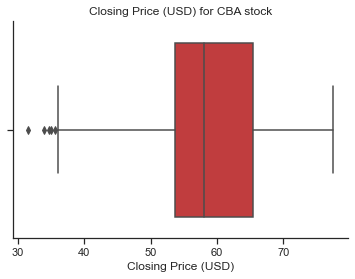

In [78]:
bp1 = sns.boxplot(price_col, color=red)
bp1.set_xlabel('Closing Price (USD)')
bp1.set_title('Closing Price (USD) for CBA stock')
bp1.set_xticks([], minor=True)
sns.despine()
plt.show()

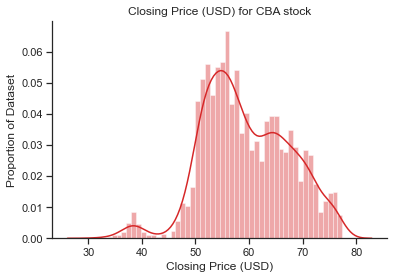

In [79]:
ax1 = sns.distplot(price_col, bins = 50, kde=True, color=red)
ax1.set_xlabel('Closing Price (USD)')
ax1.set_ylabel('Proportion of Dataset')
ax1.set_title('Closing Price (USD) for CBA stock')
ax1.set_xticks([], minor=True)
sns.despine()
plt.show()

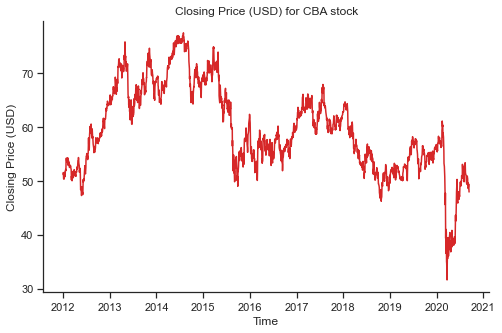

In [80]:
plt2, ax2 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], price_col, color=red)
ax2.set_xlabel('Time')
ax2.set_ylabel('Closing Price (USD)')
ax2.set_title('Closing Price (USD) for CBA stock')
ax2.set_xticks([], minor=True)
sns.despine()
plt.show()

### b) Percentage change column

In [81]:
change_col = data["%Chg"]
change_col.describe().round(4)

count    2198.0000
mean        0.0002
std         0.0130
min        -0.1001
25%        -0.0059
50%         0.0005
75%         0.0067
max         0.1326
Name: %Chg, dtype: float64

In [82]:
stats.skew(change_col)

0.2079509206505939

In [83]:
stats.kurtosis(change_col)

13.701360809228735

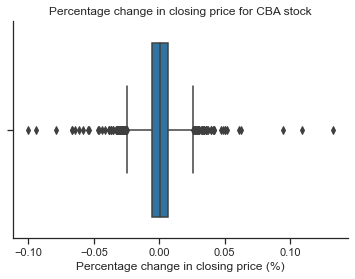

In [84]:
bp2 = sns.boxplot(change_col, color=blue)
bp2.set_xlabel('Percentage change in closing price (%)')
bp2.set_title('Percentage change in closing price for CBA stock')
bp2.set_xticks([], minor=True)
sns.despine()
plt.show()

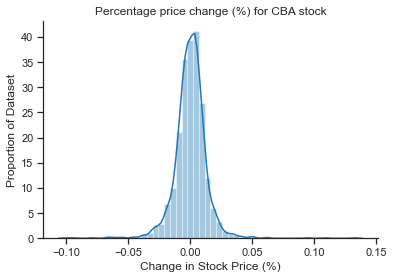

In [85]:
ax3 = sns.distplot(change_col, bins = 50, kde=True, color=blue)
ax3.set_xlabel('Change in Stock Price (%)')
ax3.set_ylabel('Proportion of Dataset')
ax3.set_title('Percentage price change (%) for CBA stock')
ax3.set_xticks([], minor=True)
sns.despine()
plt.show()

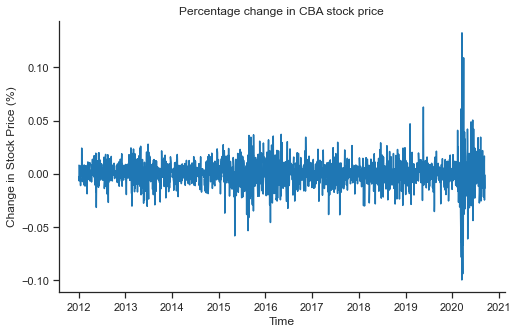

In [86]:
fig4, ax4 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], change_col, color=blue)
ax4.set_xlabel('Time')
ax4.set_ylabel('Change in Stock Price (%)')
ax4.set_title('Percentage change in CBA stock price')
ax4.set_xticks([], minor=True)
sns.despine()
plt.show()

### c) Volume column

In [87]:
volume_col = data["Volume"]
volume_col.describe().round(4)

count    2.198000e+03
mean     3.397252e+06
std      2.054749e+06
min      6.834970e+05
25%      2.276530e+06
50%      2.904897e+06
75%      3.847194e+06
max      3.561303e+07
Name: Volume, dtype: float64

In [88]:
stats.skew(volume_col)

4.836262532406086

In [89]:
stats.kurtosis(volume_col)

48.21355452357211

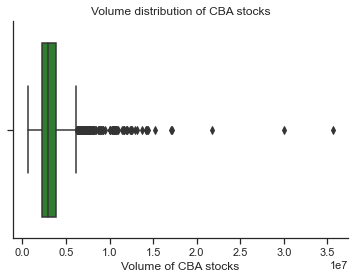

In [90]:
bp3 = sns.boxplot(volume_col, color=green)
bp3.set_xlabel('Volume of CBA stocks')
bp3.set_title('Volume distribution of CBA stocks')
bp3.set_xticks([], minor=True)
sns.despine()
plt.show()

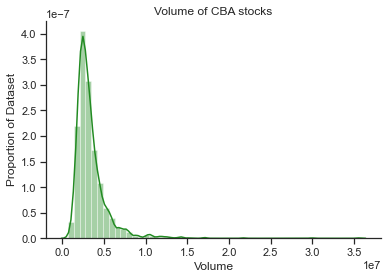

In [91]:
ax5 = sns.distplot(volume_col, bins = 50, kde=True, color=green)
ax5.set_xlabel('Volume')
ax5.set_ylabel('Proportion of Dataset')
ax5.set_title('Volume of CBA stocks')
ax5.set_xticks([], minor=True)
sns.despine()
plt.show()

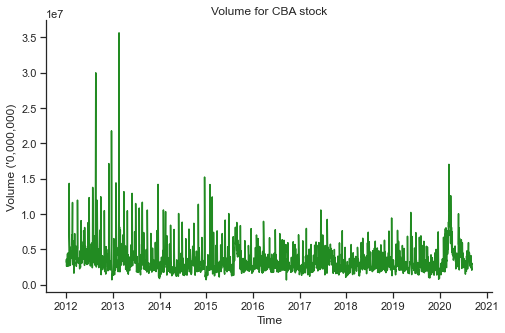

In [92]:
plt6, ax6 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], volume_col, color=green)
ax6.set_xlabel('Time')
ax6.set_ylabel("Volume ('0,000,000)")
ax6.set_title('Volume for CBA stock')
ax6.set_xticks([], minor=True)
sns.despine()
plt.show()

## 3. Further exploratory analysis on stock return

In [119]:
return_col = pd.Series(len(price_col)-1)
for i, price in enumerate(price_col):
    if i == 0:
        pass
    else:
        return_col[i-1] = np.log(price_col[i]/price_col[i-1])

In [120]:
return_col.describe().round(4)

count    2197.0000
mean       -0.0000
std         0.0149
min        -0.1213
25%        -0.0073
50%         0.0002
75%         0.0079
max         0.1049
dtype: float64

In [121]:
stats.skew(return_col)

-0.47957257082838267

In [122]:
stats.kurtosis(return_col)

9.441033961707216

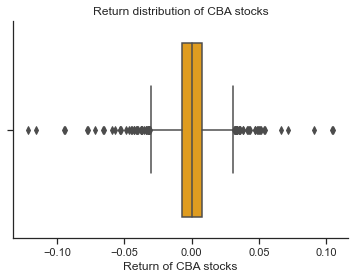

In [123]:
bp4 = sns.boxplot(return_col, color=orange)
bp4.set_xlabel('Return of CBA stocks')
bp4.set_title('Return distribution of CBA stocks')
bp4.set_xticks([], minor=True)
sns.despine()
plt.show()

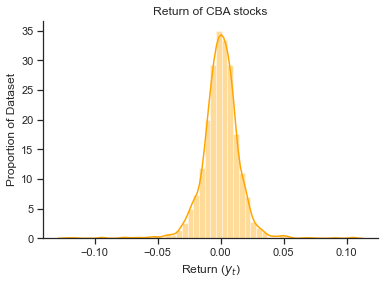

In [124]:
ax7 = sns.distplot(return_col, bins = 50, kde=True, color=orange)
ax7.set_xlabel('Return ($y_t$)')
ax7.set_ylabel('Proportion of Dataset')
ax7.set_title('Return of CBA stocks')
ax7.set_xticks([], minor=True)
sns.despine()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2198,) and (2197,)

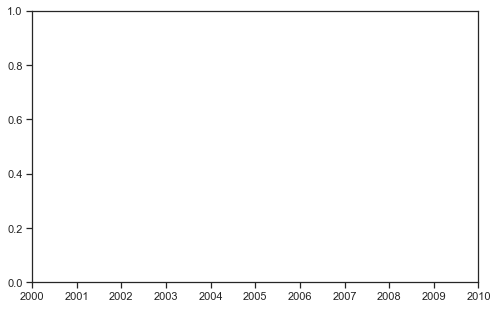

In [125]:
fig8, ax8 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], return_col, color=orange)
ax8.set_xlabel('Time')
ax8.set_ylabel('Return ($y_t$)')
ax8.set_title('Return of CBA stocks')
ax8.set_xticks([], minor=True)
sns.despine()
plt.show()